[Kaggle](www.kaggle.com) is a hub for data science. You can find data sets, code examples, and competitions there. If you don't have one already, make a kaggle account for yourself. 

Read the Overview and Data pages for the WiDS 2022 competition on estimating building energy use: https://www.kaggle.com/competitions/widsdatathon2022/data 

Then download the training data (train.csv)

From that file, plot histograms of values for the following columns:

* floor area

* elevation

* cooling degree days

* heating degree days

* site_eui

In [2]:
#Import packages & libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
#Preprocessing Functions
def MinMaxScaler(features):

    return (features-features.min())/(features.max()-features.min())

In [4]:
#Import train.csv
train_path = "data/train.csv"
train_df = pd.read_csv(train_path)

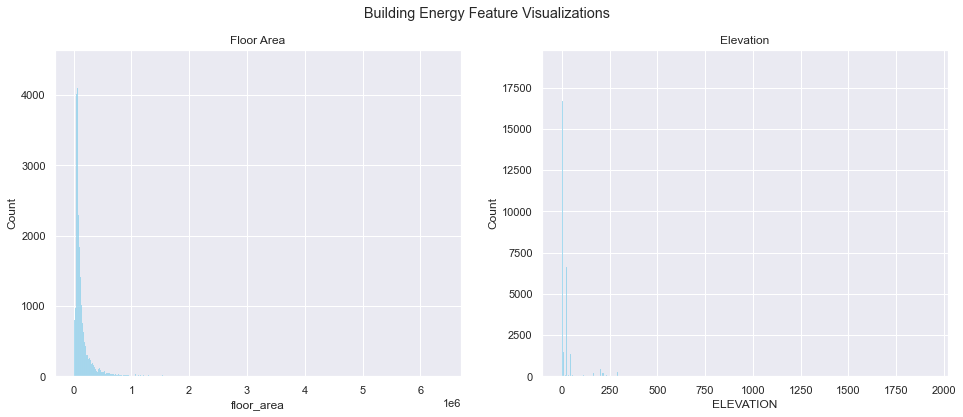

In [5]:
# Plot frist 2 import features 

sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Building Energy Feature Visualizations')

sns.histplot(data=train_df, x="floor_area", color="skyblue", ax=axs[0])
axs[0].set_title('Floor Area')

sns.histplot(data=train_df, x="ELEVATION", color="skyblue", ax=axs[1])
axs[1].set_title('Elevation')

plt.show()

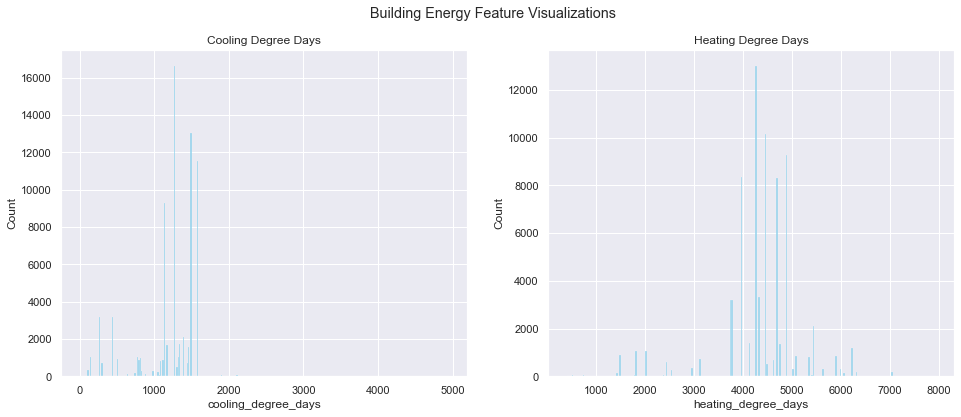

In [6]:
# Plot next 2 important features 

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Building Energy Feature Visualizations')

sns.histplot(data=train_df, x="cooling_degree_days",
             color="skyblue", ax=axs[0])
axs[0].set_title('Cooling Degree Days')

sns.histplot(data=train_df, x="heating_degree_days", color="skyblue", ax=axs[1])
axs[1].set_title('Heating Degree Days')

plt.show()

Text(0.5, 1.0, 'Site EUI')

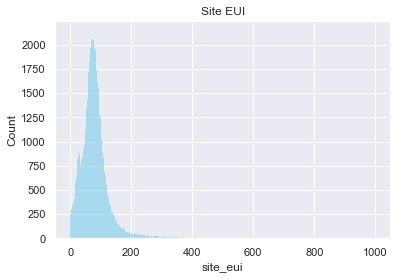

In [7]:
# Plot site_eui 

sns.histplot(data=train_df, x="site_eui",
             color="skyblue").set_title('Site EUI')

Use the values from the first four columns listed above to train a linear regression model that predicts annual building energy use (site_eui). Report the root mean squared error of your model on the training data (for more on this measure see the Evaluation page on the WiDS Kaggle). 

In [8]:
#Subset the data with features of importance
features_df = train_df[['floor_area', 'ELEVATION', 'cooling_degree_days', 'heating_degree_days']].copy()
target = train_df[['site_eui']].copy()

#Checked for null values -- no null values in features of importance 
#Normalize data for training 
#Instantiate scaler 
norm_features = MinMaxScaler(features_df)
norm_target = MinMaxScaler(target)

In [9]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    norm_features, norm_target, test_size=0.2, random_state=0)

In [10]:
#Instantiate and fit model
model = LinearRegression()
model.fit(X_train, Y_train)

#Model predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [11]:
# Model evaluation for training set 
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.05696690583190874
R2 score is 0.03406089875273177




In [12]:
# model evaluation for testing set
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set
--------------------------------------
RMSE is 0.059433268741077454
R2 score is 0.028632425415091922


As good data scientists, however, we know that in order to really test the performance of our model, we can't test it on the same data it trained on. To assess the performance of the model on a held-out test set, we will need to upload the model predictions to the Kaggle competition site.

To do this:

Download the test.csv dataset. This dataset does not include the site_eui column. 

Run your model on this data and print out the predicted site_eui for the first 5 buildings here. Save all the model predictions for site_eui as a .csv file in the form described on the Kaggle site. 

In [13]:
# Import and extra features of importance from test.csv
test_path = 'data/test.csv'
test_df = pd.read_csv(test_path)
test_features = test_df[['floor_area', 'ELEVATION',
                        'cooling_degree_days', 'heating_degree_days']].copy()

# Checked for null values -- no null values in features of importance
# Normalize data for test
norm_test_features = MinMaxScaler(test_features)

In [14]:
#Model test.csv predictions
y_predict = model.predict(norm_test_features)

In [15]:
# Print predicted site_eui for the first 5 buildings
for i in range(5):
    building = i + 1 
    print("Building {} has a predicted Site Energy Usage Intensity of: {}".format(building, float(y_predict[i])))

Building 1 has a predicted Site Energy Usage Intensity of: 0.04028625457928511
Building 2 has a predicted Site Energy Usage Intensity of: 0.038606573711669215
Building 3 has a predicted Site Energy Usage Intensity of: 0.03803577471716468
Building 4 has a predicted Site Energy Usage Intensity of: 0.04001643567934175
Building 5 has a predicted Site Energy Usage Intensity of: 0.04075581762666478


In [16]:
# Save all the model predictions for site_eui as a .csv file
filename = "output.csv"
ids = list(range(75757, (75757 + len(y_predict))))
y_predict = y_predict.reshape(1, 9705).tolist()
rows = pd.DataFrame({
    'id': ids,
    'site_eui': y_predict[0]
})

# dataframe to csv
rows.to_csv(filename, index=False)

Use the "Late Submission" button on the Kaggle site to upload your test predictions. 

Take a screenshot of the results (including both private and public score) and put it here.

![outputScore](images/output_score.png)